# An End-to-End Approach for Extracting Rationales for NLP Tasks
Inspired by [Implicit MLE: Backpropagating Through Discrete Exponential Family Distributions
](https://arxiv.org/abs/2106.01798)

## Mohammad Reza Ghasemi Madani - 0001034307
mohammadreza.ghasemi@studio.unibo.it

## Code
https://github.com/qasemii/IMLE-Annotator.git

## Abstract
The integration of discrete algorithmic components in deep learning architectures has numerous applications but poses several challenges. Implicit Maximum Likelihood Estimation (I-MLE) is a framework for end-to-end learning of models combining discrete exponential family distributions and differentiable neural components. I-MLE is widely applicable as it only requires the ability to compute the most probable states and does not rely on smooth relaxations. Several application domains, ranging from relational and explainable ML to discrete decision-making could benefit from general-purpose learning algorithms whose inductive biases are more amenable to integrating symbolic and neural computation. One other field of research related to this subject is Explainable Natural Language Processing (ExNLP). ExNLP has increasingly focused on collecting human-annotated textual explanations. These explanations are used downstream in three ways: as data augmentation to improve performance on a predictive task, as supervision to train models to produce explanations for their predictions, and as a ground-truth to evaluate model-generated explanations. Considering what we discussed above, in this research, we will explore a method that returns the output and the reasoning approach behind which must be close to humans as much as possible for a given textual input and a goal. In other words, we want the designed machine to choose the same highlights as humans in a text.

## Introduction

Neural Language Models have achieved the state-of-the-art performance in many tasks such as Sentiment Analysis, Natural Language Inference, Question Answering, etc.

<img src="https://github.com/qasemii/IMLE-Annotator/blob/main/images/examples.png?raw=true" width=1000>

However, there is a key missing, and that is the reasoning behind decision-making process. In many critical areas such as medical science, it is important to make sure the reasoning behind the decision is logical and based on key features.

<img src="https://github.com/qasemii/IMLE-Annotator/blob/main/images/drawback.png?raw=true" width=600>

In order for machine learning to garner widespread public adoption, models must be able to provide interpretable and robust explanations for their decisions, as well as learn from human-provided explanations at train time.

In this work we will utilize a method known as I-MLE (Implicit Maximum Likelihood Estimation) to handle backpropagation through discrete latent space and integrate them into deep learning models. More precisely, we are going to select *k*-subsets from the textual input that shows the selected words by machine to produce the output. We will go through a base model to see the baseline outputs. In the following, we use pre-trained models (e.g. BERT and/or its variances) to improve the results. The final aim of this research is to reach human reasoning patterns on textual input.


## Types of Explanations

There are two types of explanations, namely:
1. **Extractive Rationales (ERs)**: A subset of input features responsible for a prediction.

2. **Natural Language Explanations (NLEs)**: Human-readable justification for predictions.

The following figure shows an example of each type for a give instance from e-SNLI dataset.

<img src="https://github.com/qasemii/IMLE-Annotator/blob/main/images/explanation_types.png?raw=true" width=500>


## Extractive Rationale Criteria

In order to achieve high-quality ratioales, there are three criteria that a model should preserve:

1. **Plausibility**: This means that the rationales should make sense to humans. In the contect of extractive rationales, it is computed by simply measuring the corrolation between gold rationales and extracted ones.
2. **Task Performance**: It refers to the fact that the rationale extraction should not compromise the task performance.

## A Problem with a Common Pipeline

One of the most utilized pipelines in this field is Select-Predict-Pipelines (SPPs). SPPs are composed of two elements:

1. **Rationale Extractor**: responsible for scoring and extracting the most important tokens.
2. **Task Model**: responsible for solving the task based on the extracted rationales.

<img src="https://github.com/qasemii/IMLE-Annotator/blob/main/images/spp.png?raw=true" width=1000>

These architectures suffer from two main drawbacks:

1. Task Model only receive partial input ---> Sacrifies task performance
2. Loss cannot back propagate through Rationale Extractor ---> No end-to-end training

And the training follows the steps below:

1. Train Rationale Extractor on inputs/gold rationales
2. Train Task Model on gold rationales/labels
3. Concatenate them and evaluate



## SPP + I-MLE

Using I-MLE within SPP pipeline, enables backpropagating loss form task model through the rationale extraction and allow us to train the model in an end-to-end approach. This, results in interaction between task model and rationale extractor, therefore more balanced performance regarding the proposed criteria (plausibility and task performance).

The following figure shows the structure of the proposed End-to-End architecture. The discrete function can be anything in general. We leave the detaied discussion of the I-MLE procedure behind as it requires deep discussion.

<img src="https://github.com/qasemii/IMLE-Annotator/blob/main/images/spp-imle.png?raw=true" width=1000>

Advantages of the proposed pipeline:

1. Make discrete latent space differentiable
2. Simple to use (just a decorator on top of discrete function, e.g. top-k selector)

**!!! NOTE**: the task model still only sees a small portion of the input (depends on the number of tokens user wants the model to select) and this causes decrease in the task performance.

## Datasets

- **BeerAdvocate**:

    The BeerAdvocate dataset is a collection of beer reviews from the website BeerAdvocate.com. The dataset contains over 1.5 million reviews of more than 66,000 beers from more than 13,000 breweries. Each review consists of a rating (from 1 to 5), a text review, and some additional information such as the beer name, style, ABV (alcohol by volume), and reviewer profile. The dataset can be used for various natural language processing tasks such as sentiment analysis, text summarization, topic modeling, or rationale extraction.

- **e-SNLI**:
    
    The e-SNLI dataset is an extension of the SNLI dataset, which is a collection of sentence pairs labeled with one of three categories: entailment, contradiction, or neutral. The e-SNLI dataset adds human-written explanations for each label, as well as some additional information such as the source of the sentences and the annotator ID. The dataset contains over 550,000 sentence pairs with explanations. The dataset can be used for various natural language processing tasks such as natural language inference, explanation generation, or rationale extraction.

## Objective

As an experiment, we firstly deploy our algorithm to the `BeerAdvocate` dataset which consists of free-text reviews and ratings for 4 different aspects of beer: appearance, aroma, palate, and taste. Each sentence in the test set has annotations providing the words that best describe the various aspects. Following the experimental setup of recent works, we address the problem introduced by the L2X paper of learning a distribution over *k*-subsets of words that best explain a given aspect rating. Then we employ pre-traind models together with I-MLE algorithm to learn a distribution over *k*-subsets of words that best explain a given aspect rating. As an extension we employ `e-SNLI` to see the results on different domains. Finaly, we reaplace the previous neural network with `BERT` transformer from `HuggingFace` and investigate the output.


## Run

Installing dependencies. We utilized `WANDB` as logger. To use it, you will need an account in their website [here](https://wandb.ai/site). You can simply deactivate it by putting `WANDB_MODE=disabled` at the beginning of each run command line (this has been set by default).

In [ ]:
!pip install wandb torchmetrics datasets evaluate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


The main code is in [this](https://github.com/qasemii/IMLE-Annotator.git) github repository. We use colab to accelerate the experiment utilizing its GPUs. For the detailed implementation please refere to the source code in the given repo.

In [ ]:
!git clone https://github.com/qasemii/IMLE-Annotator.git
# !git restore .
# !git pull origin

%cd /content/IMLE-Annotator/

Cloning into 'IMLE-Annotator'...
remote: Enumerating objects: 1146, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 1146 (delta 104), reused 179 (delta 103), pack-reused 961
Receiving objects: 100% (1146/1146), 101.82 MiB | 9.21 MiB/s, done.
Resolving deltas: 100% (683/683), done.
Updating files: 100% (44/44), done.
/content/IMLE-Annotator


#### BeerAdvocate
Downloading the `BeerAdvocate` dataset. The BeerAdvocate dataset consists of free-text reviews and ratings for 4 different aspects of beer: *appearance*, *aroma*, *palate*, and *taste*. Each sentence in the test set has annotations providing the words that best describe the various aspects. The training set has 80k reviews for the aspect APPEARANCE and 70k reviews for all other aspects. Since the original dataset did not provide separate validation and test sets, we compute 10 different evenly sized validation/test splits of the 10k held out set and compute mean and standard deviation over 10 models, each trained on one split. Subset precision was computed using a subset of 993 annotated reviews (`annotation.json`). We use pre-trained word embeddings. Prior work used non-standard neural networks for which an implementation is not available. We used the neural network from the L2X paper with 4 convolutional and one dense layer.


In [ ]:
%cd /content/IMLE-Annotator/data/BeerAdvocate/

!wget http://people.csail.mit.edu/taolei/beer/annotations.json
!wget http://people.csail.mit.edu/taolei/beer/review+wiki.filtered.200.txt.gz
# aspect 0
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect0.heldout.txt.gz
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect0.train.txt.gz
# aspect 1
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect1.heldout.txt.gz
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect1.train.txt.gz
# aspect 2
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect2.heldout.txt.gz
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect2.train.txt.gz
# aspect 3
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect3.heldout.txt.gz
!wget http://people.csail.mit.edu/taolei/beer/reviews.aspect3.train.txt.gz

# Unzip the files
!gzip -d review+wiki.filtered.200.txt.gz
!gzip -d reviews.aspect0.heldout.txt.gz
!gzip -d reviews.aspect0.train.txt.gz
!gzip -d reviews.aspect1.heldout.txt.gz
!gzip -d reviews.aspect1.train.txt.gz
!gzip -d reviews.aspect2.heldout.txt.gz
!gzip -d reviews.aspect2.train.txt.gz
!gzip -d reviews.aspect3.heldout.txt.gz
!gzip -d reviews.aspect3.train.txt.gz

%cd /content/IMLE-Annotator/

/content/IMLE-Annotator/data/BeerAdvocate
--2023-12-18 15:10:30--  http://people.csail.mit.edu/taolei/beer/annotations.json
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.30.2.133
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.30.2.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2314369 (2.2M) [application/json]
Saving to: ‘annotations.json’

annotations.json    100%[===================>]   2.21M  7.62MB/s    in 0.3s    

2023-12-18 15:10:31 (7.62 MB/s) - ‘annotations.json’ saved [2314369/2314369]

--2023-12-18 15:10:31--  http://people.csail.mit.edu/taolei/beer/review+wiki.filtered.200.txt.gz
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.30.2.133
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.30.2.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100137768 (95M) [application/x-gzip]
Saving to: ‘review+wiki.filtered.200.txt.gz’

review+wiki.filtere 100%[===================

#### e-SNLI dataset
The dataset for e-SNLI is already preprocessed and saved in the repository.

#### Word Embeddings for BeerAdvocate Dataset
We need `glove.42B.300d` for tokenizing the ***e-SNLI*** dataset. We also use `nltk` embeddings. The ***BeerAdvocate*** has its own predefined tokens and embedding.

In [ ]:
%cd /content/IMLE-Annotator/data/GloVe/

!wget https://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip  glove.42B.300d.zip && rm glove.42B.300d.zip

%cd /content/IMLE-Annotator/

/content/IMLE-Annotator/data/GloVe
--2023-12-18 15:03:38--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-12-18 15:03:38--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Saving to: ‘glove.42B.300d.zip’

glove.42B.300d.zip  100%[===================>]   1.75G  5.00MB/s    in 5m 53s  

2023-12-18 15:09:32 (5.07 MB/s) - ‘glove.42B.300d.zip’ saved [1877800501/1877800501]

Archive:  glove.42B.300d.zip
  inflating:

#### Metrics
We use `MSE` as training ciriteria for BeerAdvocate as the outputs are float number as the reviewers gave an score to each beer based on their reviews. We also show `Subset-Precision` for the rationales extracted by the model to have a sense about the their quality. `Subset-Precsion` evaluate the correlation of the human rationales (gold rationales) with machine rationales (extracted rationales).

### Rationlizing BeerAdvocate Reviews


These are commands used in to tune differnt configurations:

    -a  beer aspect (0:, 1:, 2:, 3:)
    -e  number of training epochs
    -b  batch size
    -k  kernel size
    -H  hidden layer size
    -m  maximum length of input
    -K  number of token to be selected by i-mle
    -r  number of reruns
    -M  method for handling the discrete latent space (imle, aimle, sfe, etc.)

The rest of parameters are offered by the writers in [I-MLE paper](https://arxiv.org/abs/2106.01798) so we leave them unchanged.

In [ ]:
!WANDB_MODE=disabled python3 beer-cli.py \
-a 0 -e 10 -b 128 -k 3 -H 250 -m 350 -K 10 -r 1 -M imle \
--imle-samples 1 --imle-noise gumbel --imle-lambda 1000.0\
--imle-input-temperature 1.0 --imle-output-temperature 1.0

Hostname: 3b2e35a81c97
Loading heldout data...
Found 147759 word vectors.
Creating model...
Initialising the model ..
Model:
	gumbel_selector.embeddings.weight	torch.Size([106479, 200])	21295800
	gumbel_selector.first_layer.weight	torch.Size([100, 200, 3])	60000
	gumbel_selector.first_layer.bias	torch.Size([100])	100
	gumbel_selector.global_layer.weight	torch.Size([100, 100])	10000
	gumbel_selector.global_layer.bias	torch.Size([100])	100
	gumbel_selector.local_layer_1.weight	torch.Size([100, 100, 3])	30000
	gumbel_selector.local_layer_1.bias	torch.Size([100])	100
	gumbel_selector.local_layer_2.weight	torch.Size([100, 100, 3])	30000
	gumbel_selector.local_layer_2.bias	torch.Size([100])	100
	gumbel_selector.final_layer_1.weight	torch.Size([100, 200, 1])	20000
	gumbel_selector.final_layer_1.bias	torch.Size([100])	100
	gumbel_selector.final_layer_2.weight	torch.Size([1, 100, 1])	100
	gumbel_selector.final_layer_2.bias	torch.Size([1])	1
	prediction_model.embeddings.weight	torch.Size([106479

You can visualize the extracted retionales following the instructions below:

- Create an empty project in Overleaf
- Copy the code below in the Overleaf bank project
- Upload the .txt output file in the project folder
- Simply replace `<OUTPUT_FILE>` with the file you want to visualize

The output file is large and may take some minutes for Overleaf to compile. You can also open the .txt file and copy a desired portion and replace it with `\input{<OUTPUT_FILE>}`.
    
    
    \documentclass{article}
    \usepackage{color,soul}
    \usepackage[dvipsnames]{xcolor}

    \title{Weekly Meeting Notes}
    \date{}

    % custom commands
    \newcommand{\cmark}{\ding{52}}%
    \newcommand{\xmark}{\ding{56}}%
    \newcommand{\arrow}{\ding{212}}%
    \newcommand{\hlc}[2][yellow]{{
      \colorlet{foo}{#1}
      \sethlcolor{foo}
      \hl{#2}
    }}

    \begin{document}
    \maketitle

    \subsection*{Color Guide}\\
    \hlc[cyan!30]{Blue}: Human selected (ground truth)\\
    \hlc[red!60]{Red}: Machine Selected\\
    \hlc[purple!30]{Purple}: Human/Machine Selected
    \subsection*{Sign Guide}\\
    \cmark: True predicted label\\
    \xmark: Wrong predicted label\\
    \rule{\textwidth}{1pt}

    \input{<OUTPUT_FILE>}

    \end{document}

You should see something similar to the following image. This example shows rationales selected only by human (blue), only by machine (red, and we don't want this) and rationales selected by both machines and humans (purple). Also the gold true score and predicted score has been brought at the end of the review for task performance comprehension.

<img src="https://github.com/qasemii/imle-annotator/blob/main/images/BeerAdvocate-Appearance-K10.png?raw=true" width=1000>


### Rationalizing e-SNLI premise/hypothesis pairs

In [ ]:
!WANDB_MODE=disabled python3 esnli-cli.py\
-e 10 -b 256 -k 3 -H 250 -m 150 -K 3 -r 1 -M imle --highlight False\
--imle-samples 1 --imle-noise gumbel --imle-lambda 1000.0\
--imle-input-temperature 1.0 --imle-output-temperature 1.0

Hostname: 2e4c7c3f0061
Device: cuda
Loading Train Data...
Preparing Word IDs
Loading Validation Data...
Loading Test Data...
Loading GloVe ...
Creating model...
Initialising the model ..
Model:
	gumbel_selector.embeddings.weight	torch.Size([31797, 300])	9539100
	gumbel_selector.first_layer.weight	torch.Size([100, 300, 3])	90000
	gumbel_selector.first_layer.bias	torch.Size([100])	100
	gumbel_selector.global_layer.weight	torch.Size([100, 100])	10000
	gumbel_selector.global_layer.bias	torch.Size([100])	100
	gumbel_selector.local_layer_1.weight	torch.Size([100, 100, 3])	30000
	gumbel_selector.local_layer_1.bias	torch.Size([100])	100
	gumbel_selector.local_layer_2.weight	torch.Size([100, 100, 3])	30000
	gumbel_selector.local_layer_2.bias	torch.Size([100])	100
	gumbel_selector.final_layer_1.weight	torch.Size([100, 200, 1])	20000
	gumbel_selector.final_layer_1.bias	torch.Size([100])	100
	gumbel_selector.final_layer_2.weight	torch.Size([1, 100, 1])	100
	gumbel_selector.final_layer_2.bias	torch

An output instance where the model predict the label right. Note that premise and hypothesis are merged together and passed to the model as a single input.

<img src="https://github.com/qasemii/imle-annotator/blob/main/images/eSNLI-K3.png?raw=true" width=1000>

### Bert-to-Bert Model for BeerAdvocate Rationaliziation

One challenge in designing the pipeline using BERT transformers was that BERT uses its own tokenizer. Consider the following example:

    'EU rejects German call to boycott British lamb .'

Using a pre-trained bert tokenizer will return the following:

    ['[CLS]', 'EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'la', '##mb', '.', '[SEP]']


As we can see, the tokenizer added the special tokens used by the model ([CLS] at the beginning and [SEP] at the end) and left most of the words untouched. The word lamb, however, was tokenized into two subwords, la and ##mb. This introduces a mismatch between our inputs and the gold rationles: the list of gold rationales has only 9 elements, whereas our input now has 12 tokens. Accounting for the special tokens is easy (we know they are at the beginning and the end), but we also need to make sure we align all the labels with the proper words.

To solve this issue we refer to a task called "***Token Classification***" (see [this](https://huggingface.co/learn/nlp-course/chapter7/2) for more detail) where the model task is to encompass any problem that can be formulated as “attributing a label to each token in a sentence,” such as:

- **Named entity recognition (NER)**: Find the entities (such as persons, locations, or organizations) in a sentence. This can be formulated as attributing a label to each token by having one class per entity and one class for “no entity.”

- **Part-of-speech tagging (POS)**: Mark each word in a sentence as corresponding to a particular part of speech (such as noun, verb, adjective, etc.).

- **Chunking**: Find the tokens that belong to the same entity. This task (which can be combined with POS or NER) can be formulated as attributing one label (usually B-) to any tokens that are at the beginning of a chunk, another label (usually I-) to tokens that are inside a chunk, and a third label (usually O) to tokens that don’t belong to any chunk.

As you can see in the following, the tokenized input ids would be as bellow:

    [None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]

So we need to modify the tokens label such that they align with the input format that we get from BERT. In our project, `align_labels_with_tokens` is responsible for doing so and the output would be similar to the following:

Before aligning:

    [3, 0, 7, 0, 0, 0, 7, 0, 0]

After aligning:
    
    [-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]

The only difference here in our project is that in our project we only have two classes for our tokens, wether they are rationales or not. Considering this, we can now go on and train our Bert-to-Bert model. Further, `kerne size (-k)` and `hidden layer (-H)` are not required in this setting. Instead, the following options are added:

    -B  transformer checkpoint or name *default is bert-mini from HuggingFace


Since we are training two bert models without the use of HuggingFace trainer, it would take a long time to be done. In order to be able to train faster, we used just the data from `annotations.json` (which is much smaller than the main dataset) and devided it into train, validation and test set. So the comparison between Bert-to-Bert model and the baseline model that we saw earlier would not make sense. However you can simply modify the code to (by uncommenting the data section in `beer-bert.py`)

In [ ]:
!WANDB_MODE=disabled python3 beer-bert.py \
-a 0 -e 10 -b 128 -m 350 -K 10 -r 1 -M imle -B prajjwal1/bert-mini\
--imle-samples 1 --imle-noise gumbel --imle-lambda 1000.0\
--imle-input-temperature 1.0 --imle-output-temperature 1.0

2023-12-18 15:13:55.058309: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 15:13:55.058418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 15:13:55.179823: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 15:13:56.800080: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Hostname: 3b2e35a81c97
config.json: 100% 286/286 [00:00<00:00, 1.54MB/s]
vocab.txt: 100% 232k/232k [00:00<00:00, 5.54MB/s]
Tokenizing the input ...
Running tokenizer on dataset: 100% 894/894 [00:01<00:00, 838.52 examples/s]
Running tokenizer

####Some statistics

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from wordcloud import WordCloud


def show_stats(path, label='contradiction'):
    with open(path, 'rb') as file:
          stats = pickle.load(file)

    data = stats[label]

    token = np.array(list(Counter(data).keys())) # equals to list(set(words))
    count = np.array(list(Counter(data).values())) # counts the elements' frequency

    sorted_idx = np.flip(np.argsort(count))

    sorted_token = token[sorted_idx]
    sorted_count = count[sorted_idx]

    df = pd.DataFrame({'Token': sorted_token, 'Count': sorted_count})
    df.drop(index=0)
    print(df.head())



def plot_stats(path, label='contradiction', max_words = 50):
    with open(path, 'rb') as file:
      stats = pickle.load(file)

    data = stats[label]

    token = np.array(list(Counter(data).keys())) # equals to list(set(words))
    count = np.array(list(Counter(data).values())) # counts the elements' frequency

    sorted_idx = np.flip(np.argsort(count))

    sorted_token = token[sorted_idx]
    sorted_count = count[sorted_idx]

    # creating the bar plot
    plt.figure(figsize=(20, 8))
    plt.bar(sorted_token[:max_words], sorted_count[:max_words], color ='maroon', width = 0.4)



def plot_wordcloud(path, label='contradiction', max_words = 50):
    with open(path, 'rb') as file:
          stats = pickle.load(file)

    data = stats[label]

    token = np.array(list(Counter(data).keys())) # equals to list(set(words))
    count = np.array(list(Counter(data).values())) # counts the elements' frequency

    count_dict = {k: v for k,v in zip(token, count)}

    # Generate a word cloud image
    wordcloud = WordCloud(relative_scaling=0.5 , background_color="black",
                          max_words=max_words).generate_from_frequencies(count_dict)

    # Display the generated image:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



In [ ]:
PATH = 'esnli_statistics_K3.pkl'

Now we investigate the rationales distribution for the `e-SNLI` dataset just when the model predict the output label to be '**contradiction**'.

In [ ]:
# Now we visualize
show_stats(PATH, label='contradiction')

     Token  Count
0        .   5509
1      man    624
2       to    616
3  sitting    616
4        a    586


As you can see, the most selected token is " . " which at the beginning may seem weird. However, we can interpret this choice as model understaning of difference between `premise` and `hypothesis`. Since we have merged these two sentence and created a single sentences to feed to the model, it is one of the possible way to look at it.

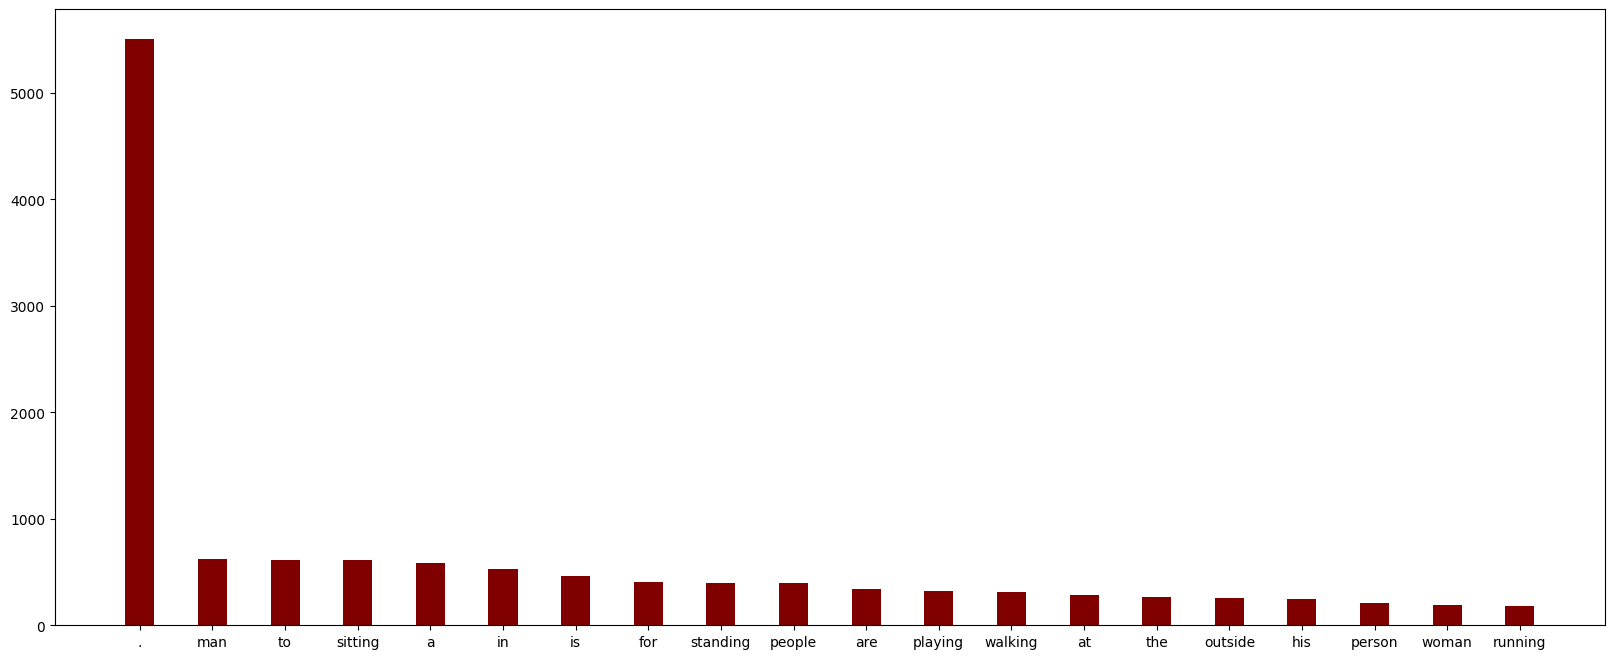

In [ ]:
plot_stats(PATH, label='contradiction', max_words = 20)

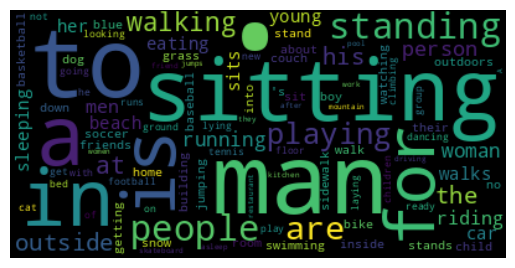

In [ ]:
plot_wordcloud(PATH, label='contradiction', max_words = 100)

The following figure shows an example of rationales only selected by human (blue), rationales only selected by machine (red), and rationales selected by both (purple). We consider human rationales as ground truth for machine rationales so we want the machine to be as close as possible to those without affecting the output task performance very much (NLI, SA, Classification, etc.)

<img src="https://github.com/qasemii/imle-annotator/blob/main/images/BeerAvocate-Aroma-K5.png?raw=true" width=1000>



## Conclusion

In the model architecture that we proposed, by increasing the value of ***k***, the number of tokens passed from rationale extractor to task model would increase and hence more inforamation and as a result better task performance. However, this may reduce the `Subset Precision` which computes the alignment between human and machine. So the value of ***k*** should be tuned as hyperparamer.

Also we noticed that the rationales extracted by human does not make sense for human all the time. For example as previously discussed the most selected token for "*contradiction*" label is " . "

This means the models rely on spurious correlation and statistical patterns which can cause poor performance on out-of-distribution dataset in future analysis.



#Future Works

- We didn't try other methods for handling discrete latent space distribution (STE, Adaptive I-MLE, etc.).

- We tried to penalized the model for the misalignment of machine with human rationales which caused the task performance to drop a lot. However, we didn't investigate the solution.

- We didn't try grid search for hyperparameter tuning since it was expensive.

- We can use more intelligent strategy of selecting top-k tokens. Since the number of highlights in each instance is not fixed, using a fixed value of top-k for all instances is not very smart. (e.g. we could use top-k%)